# Overview
- Nowadays, It is very crucial to identify your potential customers in order to have more data driven strategy to target cutomers. Therefore, in the realm of customer intelligence, customer segmentation is one of the core application where people are clustered based on different attributes which could be purchasing habits or behavioural habits.
- It is one of the application of unsupervised learning where machine learning model tries to cluster similar datapoint together in such a way that intra-cluster distance is minimized and inter-cluster distance is maximized.
- Here, I am using dataset which contains people's purchasing attributes in the Malls. Dataset is simple and has 5 features namely customer ID, Age, Gender, Credit Score and Income.

In [2]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

# Custom Styling
sns.set_palette("Reds")
sns.set_style("darkgrid")
plt.style.use('seaborn')
mycmap = plt.get_cmap('gnuplot2')
plt.style.context('dark_background')

import os
print(os.listdir("../Know your Customers better!"))

['.ipynb_checkpoints', 'Mall_Customers.csv', 'Untitled.ipynb']


# Distribution of Males and Females 
**Dataset is balanced as the distribution of males and females are almost the same!**

In [14]:
# Reading the data!

df = pd.read_csv('../Know your Customers better!/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


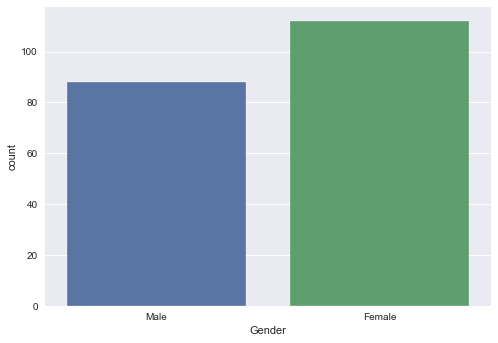

In [4]:
sns.countplot(df['Gender'])

# Pairplot showing various permutation of features
**Last row is insightful as it gives an indication of hidden clusters in the data!**

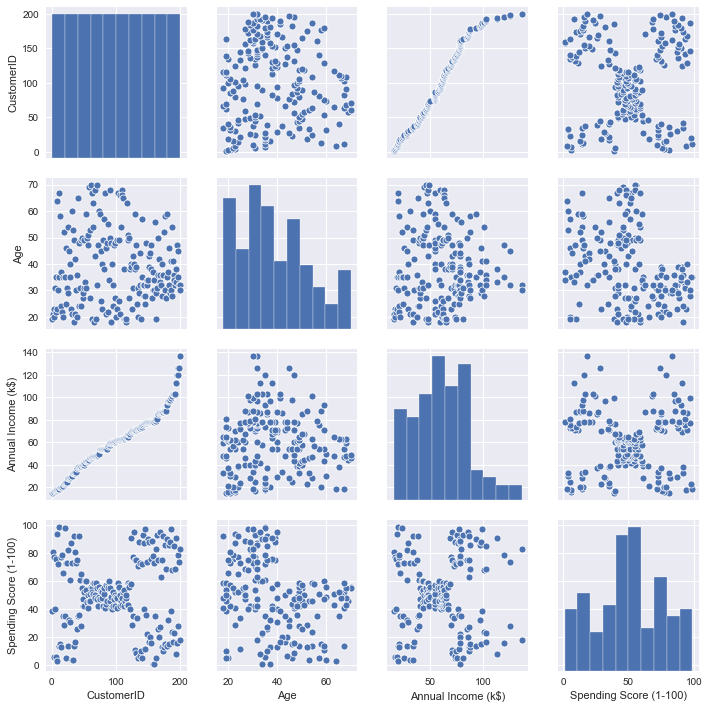

In [5]:
sns.pairplot(df)

# Jointplot of Spending Score and Age
**We find that two yellow core areas where density is very high. Perhaps, there lies two different spending habits in different age groups.**

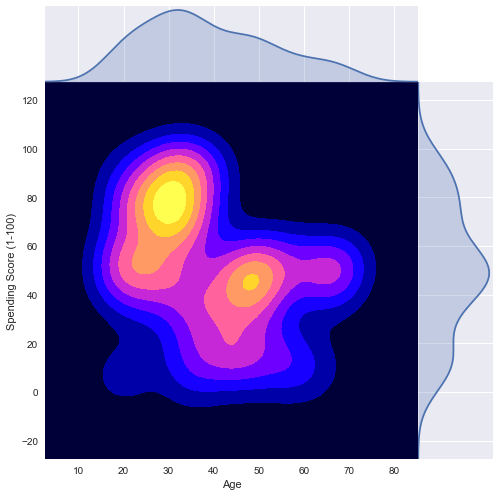

In [6]:
g = sns.jointplot(df['Age'], df['Spending Score (1-100)'], kind="kde", height=7, space=0,cmap= mycmap)

# Jointplot of Spending Score and Annual Income
Here, In Annual Income vs Spending Score, there is one area where density is very high which is in the middle. And other four areas where user shows different patterns. It might be because of the different purchasing power of the customer and their different spending habits. Five groups from the observations which can be deciphered are:

**- Low Income & High spending habits**  
**- Low Income & Low Spending habits**  
**- Moderate Income & Moderate Spending habits**  
**- High Income & High Spending habits**  
**- High Income & low Spending habits**  

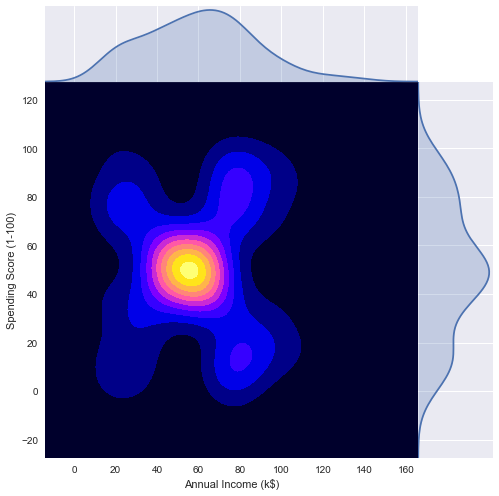

In [7]:
g = sns.jointplot(df['Annual Income (k$)'], df['Spending Score (1-100)'], kind="kde", height=7, space=0,cmap=mycmap)

# Jointplot of Annual Income and Age
**people in mid 30s have roughly mean income of 80K USD**

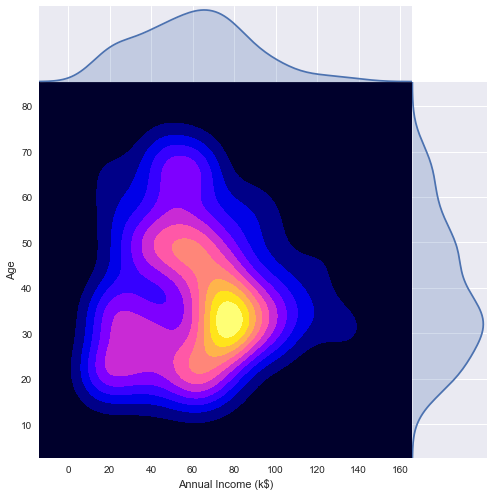

In [8]:
g = sns.jointplot(df['Annual Income (k$)'], df['Age'], kind="kde", height=7, space=0, cmap= mycmap)

**- If we compare the yearly income of more than 100k, One can find that males have income more than 100K in early 30s and in the case of females it's around mid 40s. Perhaps, this is due to the disparity in pay between males and females.**

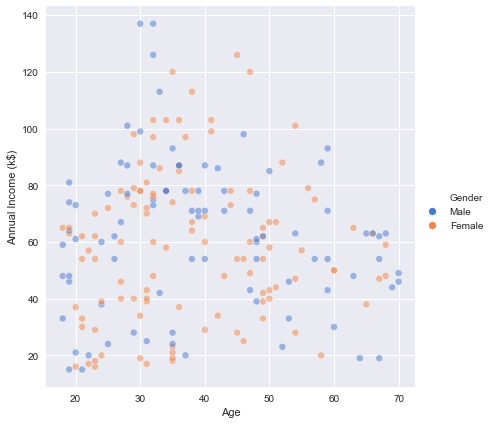

In [9]:
sns.relplot(x="Age", y="Annual Income (k$)", hue="Gender",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)

# Encoding Gender

In [16]:
df['Gender']= df['Gender'].map({'Male':1,'Female':0})
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


# Box Plot of Spending Score of different gender
- Mean Spending Score of females are slighlty more than that of the males.  
**Male -> 1 and Female -> 0**

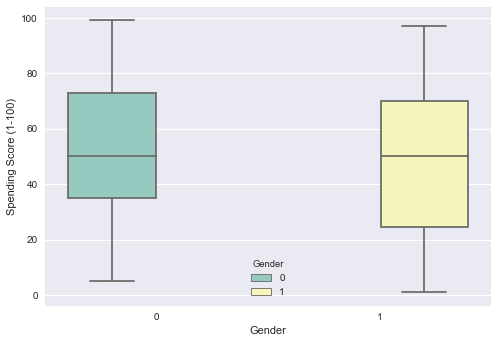

In [17]:
ax = sns.boxplot(x="Gender", y="Spending Score (1-100)", hue="Gender",  data=df, palette="Set3")

# Annual Income of Males and Females
**Notice the bulge of the graph, It shows the mean value. Thus, average income of females is less than that of females.**

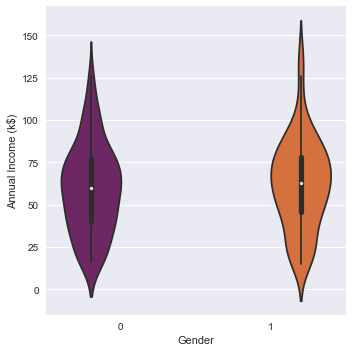

In [18]:
sns.catplot(x="Gender", y="Annual Income (k$)", hue="Gender",
            kind="violin", split=False, data=df,palette='inferno')

# Age distribution
**In our data, majority of the people are less than 45 years of age.**

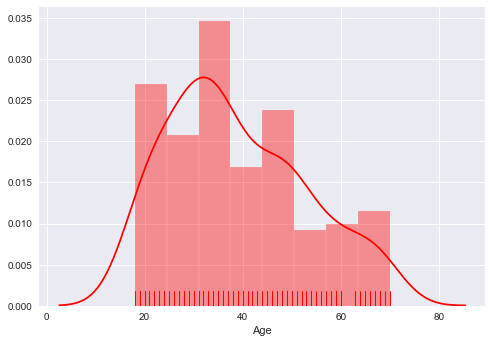

In [19]:
sns.distplot(df['Age'], hist=True, rug=True,color='r')

# Spending Score distribution
**For most of the customers, spending score centers between 40 and 60.**

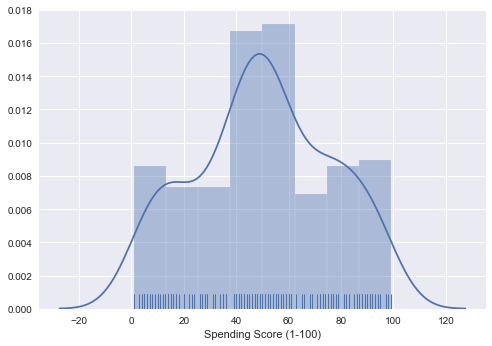

In [20]:
sns.distplot(df['Spending Score (1-100)'], hist=True, rug=True)

# Correlation Plot
**Annual income and gender have positive correlation. Also, annual income and spending score has positive correlation!**

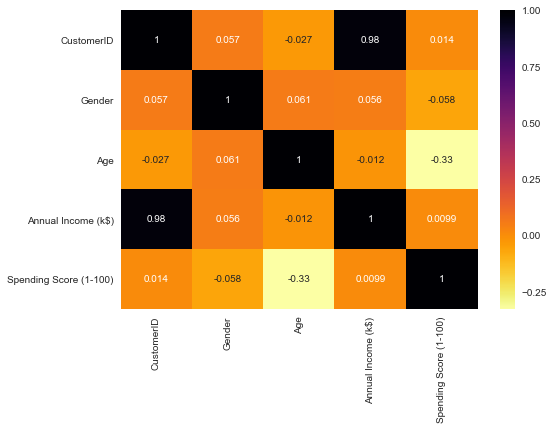

In [21]:
sns.heatmap(df.corr(), annot=True,cmap='inferno_r')

# Customer Segmentation with Kmeans
1. Kmeans algorithm is an iterative algorithm that tries to partition the dataset into Kpre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group.
2. It tries to make the intra-cluster data points as similar as possible while also keeping the clusters as different (far) as possible.
3. It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid (arithmetic mean of all the data points that belong to that cluster) is at the minimum.
4. The less variation we have within clusters, the more homogeneous (similar) the data points are within the same cluster.

**One can use standard scaler to scale the features however it isn't required in this dataset as the values are already in same range. But if in your data values are in different scale. Then, consider removing comments from the KMeans function.**

In [22]:
def kmeans(X, n_clusters):
    #ss = StandardScaler()
    #X = ss.fit_transform(X)
    km = KMeans(n_clusters=n_clusters)
    km.fit(X)
    y_pred = km.predict(X)
    return y_pred


def plot_clusters(algo_name, y_pred, x_label,y_label):
    plt.scatter(X[:,0], X[:,1],c=y_pred,cmap='Paired')
    plt.title(algo_name)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

In [23]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


### Finding right value of 'K' in Kmeans:
**1. However, Elbow plot is very popular way to identify the good value of 'K'. However, It is quite subjective and sometimes there is no clear bend from which one could take a decisive call of picking 'K'**  
**Thus, one robust way is to use Silhouette Score!**

#### Silhoutte Score:
**The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is  
(b - a) / max(a, b)**  

**b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is  
2 <= n_labels <= n_samples - 1**  
##### Trying to find clusters based on the features like Annual Income & Spending Score

In [26]:
X=df.iloc[:,3:].to_numpy()

silhouette_scores ={}
for k in range(2,10):
    y_pred = kmeans(X,k)
    silhouette_scores[k]= silhouette_score(X,y_pred)

silhouette_scores

{2: 0.2968969162503008,
 3: 0.46761358158775435,
 4: 0.4931963109249047,
 5: 0.553931997444648,
 6: 0.5393922132561455,
 7: 0.5321706886465517,
 8: 0.45827056882053113,
 9: 0.4605043439759829}

#### Since Silhouette score is maximum for K=5, It is a good idea to cluster the data into 5 subgroups

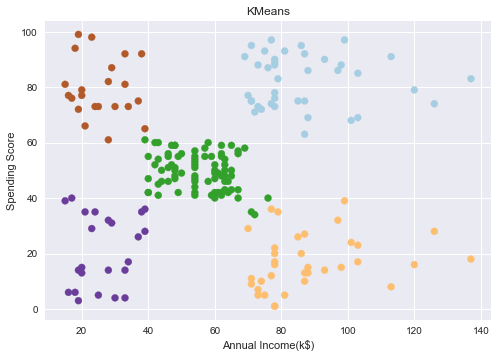

In [27]:
y_pred= kmeans(X,5)
plot_clusters("KMeans",y_pred,"Annual Income(k$)","Spending Score")

# Final remarks
**1. So, depending upon the customer segmentation, One could formulate their marketing strategies in order to sell their products to the target audience.**  
**2. For example, Customers who are in group green have annual income in upper end. However, they are miser so one would have to put in lot of efforts to make them purchase items which they don't need immediately.**  
**3. Whereas people in purple/violet cluster are the ones who every salesman want to target because they are spendthrift.**  
**4. People in lightblue cluster are the ones who relies on the credit card a lot and have higher chances of becoming defaulters because their income is low but they are spendthrift.**